<a href="https://colab.research.google.com/github/AndroGari/IntrusionDetectionSystem/blob/master/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing relevant modules 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

pdf=pd.read_csv('/content/drive/MyDrive/Subdataset1.csv')
pdf

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,06/01/18 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,1,0,0,35.536686,1,0,0,0.0,0,49.809330,1,34.350811,1,0,0,30.512712,1,0.0,0,81.605408,1,2.974053,33.506031,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,06/01/18 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,1,0,0,34.454914,1,0,0,0.0,0,48.921925,1,34.219593,1,0,0,30.480455,1,0.0,0,81.181030,1,2.974005,33.453247,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,06/01/18 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,1,0,0,33.487091,1,0,0,0.0,0,48.555843,1,33.560364,1,0,0,29.068352,1,0.0,0,83.643311,1,2.974333,33.818413,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,06/01/18 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,1,0,0,32.585545,1,0,0,0.0,0,47.823227,1,0.000000,0,0,0,29.890045,1,0.0,0,87.657402,1,2.974740,34.274750,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,06/01/18 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,1,0,0,31.469677,1,0,0,0.0,0,46.558678,1,0.000000,0,0,0,29.812771,1,0.0,0,88.074234,1,2.974847,34.395435,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,05/01/19 20,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,1,0,0,0.000000,0,0,0,0.0,0,50.868664,1,35.932934,1,0,0,29.866179,1,0.0,0,82.677170,1,2.975208,34.801918,28.982214,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954
8757,05/01/19 21,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,96.464813,1,0,0,0.000000,0,0,0,0.0,0,50.965359,1,38.114395,1,0,0,0.000000,0,0.0,0,81.965385,1,2.975278,34.881859,29.289864,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996
8758,05/01/19 22,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,1,0,0,37.008854,1,0,0,0.0,0,50.560604,1,35.499474,1,0,0,31.198389,1,0.0,0,82.533981,1,2.975049,34.622402,28.281702,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142
8759,05/01/19 23,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,97.225647,1,0,0,36.427517,1,0,0,0.0,0,50.834183,1,35.245262,1,0,0,31.060823,1,0.0,0,81.418022,1,2.974916,34.473240,28.224844,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789


In [ ]:
ndf=pd.read_csv('/content/drive/MyDrive/Subdataset2.csv')
ndf

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,04/07/20 00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,1,0,0,0.00,0,0,0,0.00,0,49.84,1,35.54,1,0,0,29.87,1,0.0,0,0.00,0,2.98,36.38,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,04/07/20 01,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,1,0,0,34.26,1,0,0,0.00,0,48.38,1,37.83,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.60,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,04/07/20 02,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,1,0,0,32.97,1,0,0,0.00,0,46.84,1,37.31,1,0,0,0.00,0,0.0,0,0.00,0,2.98,38.36,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,04/07/20 03,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,1,0,0,33.27,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.68,1,0.0,0,0.00,0,2.98,39.29,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,04/07/20 04,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,1,0,0,32.99,1,0,0,0.00,0,0.00,0,0.00,0,0,0,32.81,1,0.0,0,0.00,0,2.98,39.85,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,24/12/20 20,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.30,1,34.27,1,0,0,30.71,1,0.0,0,67.23,1,2.99,21.70,27.42,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98
4173,24/12/20 21,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,0,0,0,0.00,0,0,0,0.00,0,50.78,1,0.00,0,0,0,32.47,1,0.0,0,70.89,1,2.99,22.25,27.71,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29
4174,24/12/20 22,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,0,0,0,36.84,1,0,0,0.00,0,50.69,1,0.00,0,0,0,32.43,1,0.0,0,66.71,1,2.99,21.33,26.77,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78
4175,24/12/20 23,1.52,2.52,3.33,2.03,1.69,5.10,1.39,120.02,1,0.00,0,0,0,35.98,1,0,0,36.94,1,36.92,1,0.00,0,0,0,32.42,1,0.0,0,76.14,1,2.99,21.74,25.75,86.15,25.78,103.63,24.77,59.01,24.65,66.42,28.98,28.08


In [ ]:
pdf.describe()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,S_PU2,F_PU3,S_PU3,F_PU4,S_PU4,F_PU5,S_PU5,F_PU6,S_PU6,F_PU7,S_PU7,F_PU8,S_PU8,F_PU9,S_PU9,F_PU10,S_PU10,F_PU11,S_PU11,F_V2,S_V2,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,8761.000000,8761.0,8761.0,8761.000000,8761.000000,8761.0,8761.0,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.0,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672,100.926032,1.0,69.464357,0.730624,0.0,0.0,14.555019,0.422440,0.0,0.0,0.067010,0.001826,41.713934,0.846022,21.092609,0.594909,0.0,0.0,25.113333,0.813035,0.010240,0.000457,56.465939,0.729141,2.979773,32.369772,27.766451,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849,10.048618,0.0,42.239742,0.443661,0.0,0.0,17.042785,0.493976,0.0,0.0,1.566865,0.042698,17.832829,0.360948,17.421239,0.490938,0.0,0.0,12.080971,0.389906,0.480321,0.021364,36.019398,0.444429,0.006436,5.556626,2.740755,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194,85.495201,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.973505,20.172508,20.629910,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062,94.342598,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,47.856720,1.000000,0.000000,0.000000,0.0,0.0,29.492449,1.000000,0.000000,0.000000,0.000000,0.000000,2.975207,26.161434,26.656116,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838,96.729073,1.0,94.075195,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,49.235249,1.000000,34.566250,1.000000,0.0,0.0,30.518000,1.000000,0.000000,0.000000,70.145271,1.000000,2.976400,34.729843,28.108925,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883,112.294952,1.0,96.614708,1.000000,0.0,0.0,34.030491,1.000000,0.0,0.0,0.000000,0.000000,50.052559,1.000000,35.539124,1.000000,0.0,0.0,31.368645,1.000000,0.000000,0.000000,82.978416,1.000000,2.989567,36.005779,29.552883,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618,122.705627,1.0,100.140671,1.000000,0.0,0.0,38.296165,1.000000,0.0,0.0,37.808529,1.000000,51.658520,1.000000,39.133995,1.000000,0.0,0.0,33.888046,1.000000,24.025967,1.000000,115.467079,1.000000,2.991268,40.634285,33.763836,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724


In [ ]:
pdf.isnull().values.any()

False

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  8761 non-null   object 
 1   L_T1      8761 non-null   float64
 2   L_T2      8761 non-null   float64
 3   L_T3      8761 non-null   float64
 4   L_T4      8761 non-null   float64
 5   L_T5      8761 non-null   float64
 6   L_T6      8761 non-null   float64
 7   L_T7      8761 non-null   float64
 8   F_PU1     8761 non-null   float64
 9   S_PU1     8761 non-null   int64  
 10  F_PU2     8761 non-null   float64
 11  S_PU2     8761 non-null   int64  
 12  F_PU3     8761 non-null   int64  
 13  S_PU3     8761 non-null   int64  
 14  F_PU4     8761 non-null   float64
 15  S_PU4     8761 non-null   int64  
 16  F_PU5     8761 non-null   int64  
 17  S_PU5     8761 non-null   int64  
 18  F_PU6     8761 non-null   float64
 19  S_PU6     8761 non-null   int64  
 20  F_PU7     8761 non-null   floa

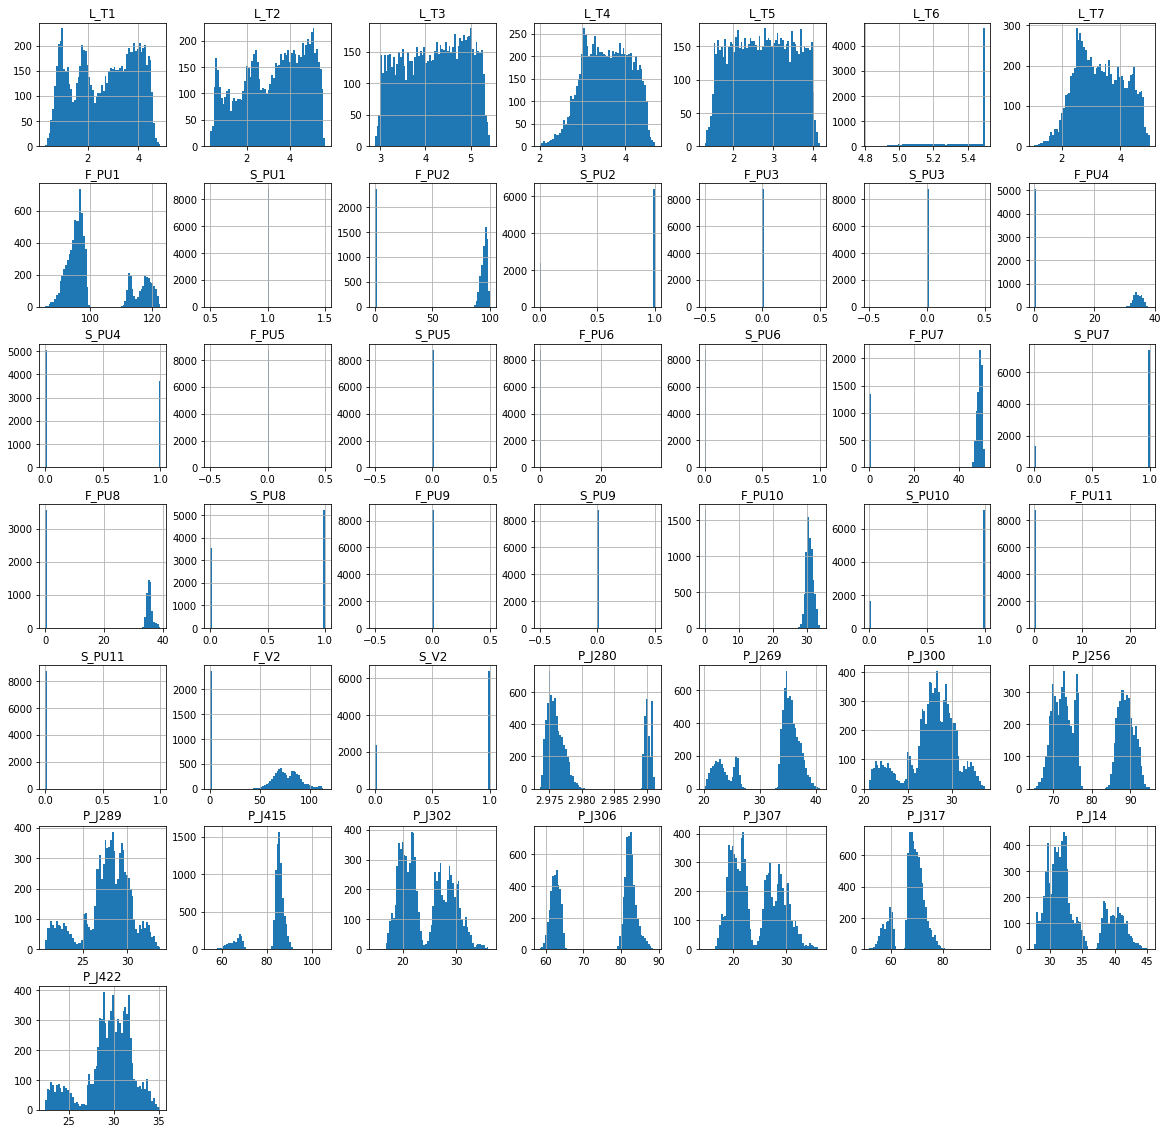

In [ ]:
pdf.hist(figsize=(20,20),bins=64)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [ ]:
pdfv = np.array(pdf.iloc[:, 1:].values)
ndfv = np.array(ndf.iloc[:, 1:].values)

In [ ]:
py = np.zeros(pdfv.shape[0], dtype=np.int32)
ny = np.ones(ndfv.shape[0], dtype=np.int32)

In [ ]:
import sys


X_train = np.concatenate([pdfv, ndfv])
Y_train = np.concatenate([py, ny])

# read test data
dfy = pd.read_csv('/content/drive/MyDrive/Q1_IDS_test.csv')
testIdx = dfy.iloc[:, 0].values
X_test = np.array(dfy.iloc[:, 1:].values)

In [ ]:
# normalize data
X_mean = np.mean(np.concatenate([X_train, X_test]), axis=0)
X_std = np.std(np.concatenate([X_train, X_test]), axis=0)

In [ ]:

X_train = (X_train - X_mean) / (X_std + 1e-8)
X_test = (X_test - X_mean) / (X_std + 1e-8)

In [ ]:
X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).long()
X_test = torch.from_numpy(X_test).float()

h1, h2, h3, h4 = 32, 16, 10, 6 

# initialize multi-layer net
net = nn.Sequential(
	nn.Linear(43, h1), nn.BatchNorm1d(h1), nn.ReLU(),
	nn.Linear(h1, h2), nn.BatchNorm1d(h2), nn.ReLU(),
	nn.Linear(h2, h3), nn.BatchNorm1d(h3), nn.ReLU(),
	nn.Linear(h3, h4), nn.BatchNorm1d(h4), nn.ReLU(),
	nn.Linear(h4, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
with torch.no_grad():
	out = net(X_test)
	_, predicted = torch.max(out.data, 1)
	print('# ATTACK SAMPLES : {0} / {1}'.format((predicted == 1).sum().item(), predicted.shape[0]))
	# print('seed:{0}  attack:{1}'.format(seed, (predicted == 1).sum().item()))

# ATTACK SAMPLES : 1757 / 1874


In [ ]:

results = []
for i in range(predicted.shape[0]):
	idx = testIdx[i]
	pred = predicted[i].item()
	label = 'NORMAL'
	if pred == 1:
		label = 'ATTACK'
	results.append([idx, label])

out_df = pd.DataFrame(data=results, columns=["TIME", "LEBEL"])
out_df.to_csv('result.csv', index=False)
print('result saved to ./result.csv')

result saved to ./result.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

ndf[["date","time"]]=ndf["DATETIME"].str.split(" ",expand=True)
ndf[["date","month","year"]]=ndf["date"].str.split("/",expand=True)

ndf[["date&time"]]="20"+ndf["year"].astype(str)+"-"+ndf["month"]+"-"+ndf["date"]+" "+ndf["time"]+":00:00"
ndf.drop(["date","month","year","time"],axis=1,inplace=True)

import datetime as dt
ndf["date&time"]=pd.to_datetime(ndf["date&time"])
timestamp=[]
timestamp=ndf["date&time"]
LABEL=[] 
 
dt1=dt.datetime(2020,9,13,23)
td1=dt.datetime(2020,9,16,00)
dt2=dt.datetime(2020,9,26,11)
td2=dt.datetime(2020,9,27,10)
dt3=dt.datetime(2020,10,9,9)
td3=dt.datetime(2020,10,11,20)
dt4=dt.datetime(2020,10,29,19)
td4=dt.datetime(2020,11,2,16)
dt5=dt.datetime(2020,11,26,17)
td5=dt.datetime(2020,11,29,4)
dt6=dt.datetime(2020,12,6,7)
td6=dt.datetime(2020,12,10,4)
dt7=dt.datetime(2020,12,14,15)
td7=dt.datetime(2020,12,19,4)


for i in range(len(timestamp)):
  if timestamp[i]>=dt1 and timestamp[i]<=td1:
    LABEL.append(1)
  elif timestamp[i]>=dt2 and timestamp[i]<=td2:
    LABEL.append(1)
  elif timestamp[i]>=dt3 and timestamp[i]<=td3:
    LABEL.append(1)
  elif timestamp[i]>=dt4 and timestamp[i]<=td4:
    LABEL.append(1)
  elif timestamp[i]>=dt5 and timestamp[i]<=td5:
    LABEL.append(1)
  elif timestamp[i]>=dt6 and timestamp[i]<=dt6:
    LABEL.append(1)
  elif timestamp[i]>=dt7 and timestamp[i]<=td7: 
    LABEL.append(1) 
  else: 
    LABEL.append(0)

ndf.drop(["date&time"],axis=1,inplace=True)
ndf["LABEL"]=LABEL

le = LabelEncoder()
datetime = le.fit_transform(ndf['DATETIME'])
datetime2= le.fit_transform(pdf['DATETIME'])
ndf["DATETIME"]=datetime
pdf["DATETIME"]=datetime2

In [ ]:
X = ndf.drop(["LABEL"],axis=1).values
Y = ndf.iloc[:, -1].values
Y=np.ravel(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = Y)

In [ ]:
clfr = RandomForestClassifier(n_estimators = 50)
clfr.fit(X_train, Y_train.ravel())
Y_test_pred = clfr.predict(X_test)
print(clfr.score(X_train, Y_train))
print(clfr.score(X_test, Y_test))
print(classification_report(Y_test, Y_test_pred))

0.9996578857338351
0.9401913875598086
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1134
           1       0.94      0.40      0.56       120

    accuracy                           0.94      1254
   macro avg       0.94      0.70      0.76      1254
weighted avg       0.94      0.94      0.93      1254

